1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [8]:
from scipy.stats import poisson
import numpy as np
import matplotlib as plt
from math import sqrt, pi, erf
from scipy import stats

h_2005 = 15
sigma = 2.5

#historic average 6.3
x_rvs = poisson.rvs(6.3,size=250000, random_state=0)
print("Hurricanes happened in each year in the last 250000 year: ",x_rvs)
mu = x_rvs.mean()

#Z score
Z = abs(h_2005 - mu) / sigma
print("Z =", Z)
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))

#perform the p-value
print("p-value =", pvalue)

Hurricanes happened in each year in the last 250000 year:  [12  3  9 ...  5  8 13]
Z = 3.4783552
p-value = 0.000504500924080702


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -5.355623844793182


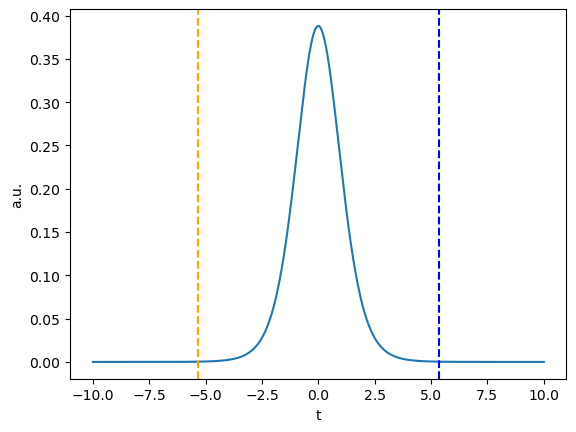

p-value = 0.00045894515934558235


In [10]:
import matplotlib.pyplot as plt

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1)) #calculate the variance and its sqrt()
sigma2 = np.sqrt(np.var(post, ddof=1)) #calculate the variance and its sqrt()
sigma = np.sqrt(((sigma1 **2)+(sigma2 **2))/2)
sample_mean1 = np.mean(pre)
sample_mean2 = np.mean(post)
n = len(pre)
T = (sample_mean1 - sample_mean2) / (sigma / np.sqrt(n))
print("T =", T)

xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

#calculate the p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

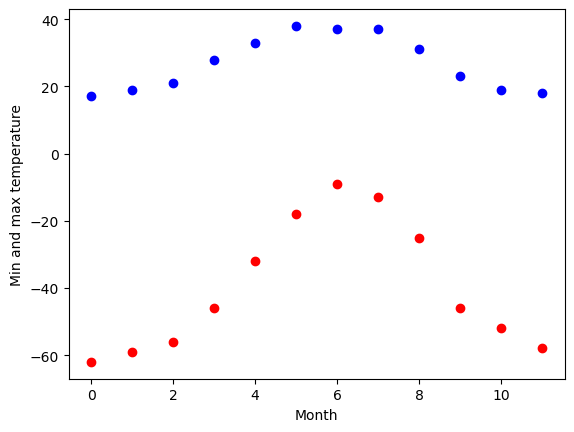

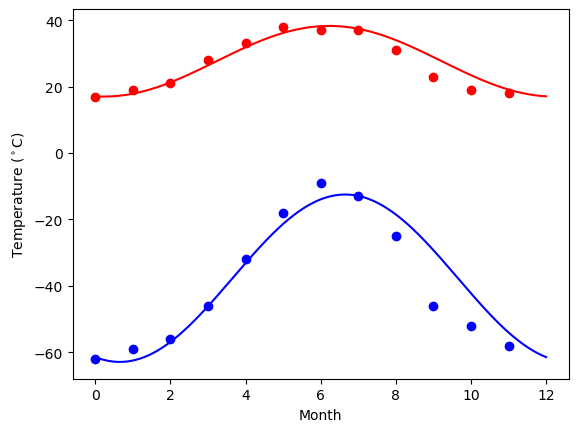

It is a reasonable fit.
Until 6th month, the fit is working. But after that it is not.


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#Plot these temperatures.
months = np.arange(12)
plt.plot(months, temp_max, 'bo')
plt.plot(months, temp_min, 'ro')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
 
#Find a suitable a function that can describe min and max temperatures. 
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

#Fit this function to the data with `scipy.optimize.curve_fit()`.
res_max, cov_max = optimize.curve_fit(yearly_temps, months, temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, temp_min, [-40, 20, 0])

days = np.linspace(0, 12, num=365)

#Plot the result.
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

print("It is a reasonable fit.\nUntil 6th month, the fit is working. But after that it is not.")

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

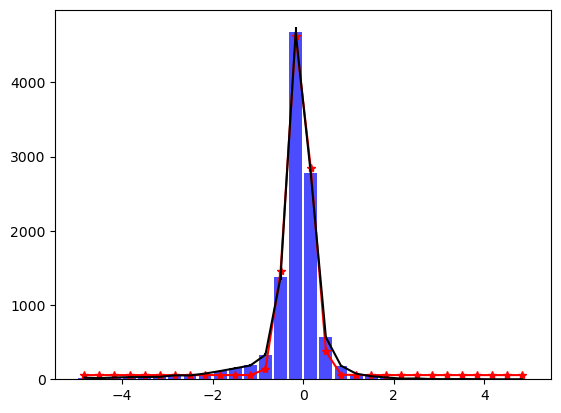

In [44]:
import math

#Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
residuals_261 = np.load('data/residuals_261.pkl', allow_pickle=True)
df=pd.DataFrame(residuals_261.item())
plt.figure()
n, bins, patches = plt.hist(df['residuals'], bins=30, color='blue', alpha=0.7, rwidth=0.85, range = (-5,5))

#Set the appropriate Poisson uncertainty for each bin
bin_cntr = (bins[:-1] + bins[1:]) / (2.0)
sigma = np.sqrt(np.abs(n))
plt.errorbar(x = bin_cntr, y = n, yerr=sigma, color="black")

#By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
def gaussian(x, amp, cen, wid, offset):
     return amp * np.exp(-(x-cen)**2 / (2*wid**2)) + offset

params, cov = curve_fit(gaussian, bin_cntr, n)

fitted_gaussian = gaussian(bin_cntr, *params)
plt.plot(bin_cntr, gaussian(bin_cntr, *params), marker='*',color='red')

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

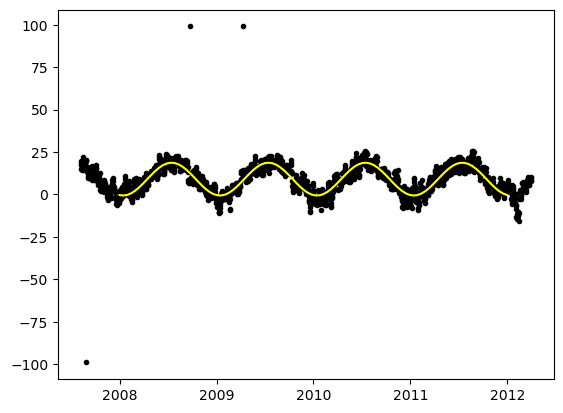

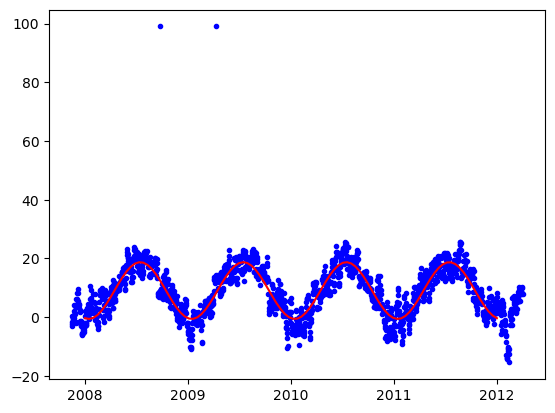

In [29]:
import numpy as np
from scipy.optimize import curve_fit

date,temperature = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt', unpack=True)

def f_mun(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = curve_fit(f_mun, date, temperature)
plt.figure()
plt.plot(date[4600:6300], temperature[4600:6300], '.',color='black')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, f2(xfine, *popt), color='yellow')


def g_mun(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = curve_fit(g2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='blue')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, g2(xfine, *popt), color='red')